# Getting started

Once you've chosen your scenario, download the data from [the Iowa website](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy) in csv format. Start by loading the data with pandas. You may need to parse the date columns appropriately.

In [1]:
import pandas as pd
import numpy as np
import sklearn
import datetime as dt
from sklearn import preprocessing
# from sklearn.cross_validation import train_test_split
import sklearn.model_selection
from sklearn import linear_model
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
## Load the data into a DataFrame
# pd.read_csv()
df_main= pd.read_csv('Iowa_Liquor_sales_sample_10pct.csv')
df_main.columns = [x.strip() for x in df_main.columns]
print df_main.shape
df_main.head()
## Transform the dates if needed, e.g.
# df["Date"] = pd.to_datetime(df["Date"], format="%m-%d-%y")

(270955, 18)


,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.5,0.40
2,02/11/2016,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.0,6.34
3,02/03/2016,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,$9.50,$14.25,6,$85.50,10.5,2.77
4,08/18/2015,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,$7.20,$10.80,12,$129.60,21.0,5.55


In [3]:
df_main["Date"] = pd.to_datetime(df_main["Date"], format="%m/%d/%Y")

In [4]:
df_main['Sale (Dollars)'] = df_main['Sale (Dollars)'].astype(str)
df_main['Sale (Dollars)'] = df_main['Sale (Dollars)'].str.replace('$','').replace(',','').astype(float)

In [5]:
df_main['State Bottle Cost'] = df_main['State Bottle Cost'].str.replace('$','').replace(',','').astype(float)
df_main['State Bottle Retail'] = df_main['State Bottle Retail'].str.replace('$','').replace(',','').astype(float)

In [6]:
df_main['Zip Code']= df_main['Zip Code'].str.replace('-','').astype(int)

In [7]:
df_main.dtypes

Date                     datetime64[ns]
Store Number                      int64
City                             object
Zip Code                          int64
County Number                   float64
County                           object
Category                        float64
Category Name                    object
Vendor Number                     int64
Item Number                       int64
Item Description                 object
Bottle Volume (ml)                int64
State Bottle Cost               float64
State Bottle Retail             float64
Bottles Sold                      int64
Sale (Dollars)                  float64
Volume Sold (Liters)            float64
Volume Sold (Gallons)           float64
dtype: object

###  ***COmpleted data conversions for data set***

# Explore the data

Perform some exploratory statistical analysis and make some plots, such as histograms of transaction totals, bottles sold, etc.

In [8]:
df_main.corr()

,Store Number,Zip Code,County Number,Category,Vendor Number,Item Number,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
Store Number,1.000000,-0.019848,0.007510,-0.012111,-0.004533,-0.026386,-0.063475,-0.071382,-0.071520,0.014422,-0.017941,-0.017696,-0.017686
Zip Code,-0.019848,1.000000,-0.015780,-0.000697,-0.002073,-0.004574,-0.013221,-0.014589,-0.014614,0.005415,0.000555,0.000717,0.000719
County Number,0.007510,-0.015780,1.000000,-0.006336,0.001746,0.006810,-0.027694,0.012186,0.012113,0.018945,0.019851,0.010199,0.010208
Category,-0.012111,-0.000697,-0.006336,1.000000,0.091920,0.116385,-0.009294,-0.013358,-0.013545,-0.000208,0.006382,-0.004375,-0.004367
Vendor Number,-0.004533,-0.002073,0.001746,0.091920,1.000000,0.136120,0.024561,0.003477,0.003085,-0.002116,-0.012277,-0.007432,-0.007428
Item Number,-0.026386,-0.004574,0.006810,0.116385,0.136120,1.000000,-0.057282,0.097879,0.097612,-0.004766,0.002987,-0.009555,-0.009545
Bottle Volume (ml),-0.063475,-0.013221,-0.027694,-0.009294,0.024561,-0.057282,1.000000,0.312841,0.313819,-0.012476,0.082446,0.156258,0.156090
State Bottle Cost,-0.071382,-0.014589,0.012186,-0.013358,0.003477,0.097879,0.312841,1.000000,0.999960,-0.062980,0.135931,0.009296,0.009264
State Bottle Retail,-0.071520,-0.014614,0.012113,-0.013545,0.003085,0.097612,0.313819,0.999960,1.000000,-0.062831,0.136114,0.009736,0.009705
Bottles Sold,0.014422,0.005415,0.018945,-0.000208,-0.002116,-0.004766,-0.012476,-0.062980,-0.062831,1.000000,0.825446,0.883348,0.883378


In [9]:
df_main.dtypes

Date                     datetime64[ns]
Store Number                      int64
City                             object
Zip Code                          int64
County Number                   float64
County                           object
Category                        float64
Category Name                    object
Vendor Number                     int64
Item Number                       int64
Item Description                 object
Bottle Volume (ml)                int64
State Bottle Cost               float64
State Bottle Retail             float64
Bottles Sold                      int64
Sale (Dollars)                  float64
Volume Sold (Liters)            float64
Volume Sold (Gallons)           float64
dtype: object

# Nothing we care about has nulls so we'll be ok when we refine our X.

In [10]:
df_main.isnull().sum()

Date                        0
Store Number                0
City                        0
Zip Code                    0
County Number            1077
County                   1077
Category                   68
Category Name             632
Vendor Number               0
Item Number                 0
Item Description            0
Bottle Volume (ml)          0
State Bottle Cost           0
State Bottle Retail         0
Bottles Sold                0
Sale (Dollars)              0
Volume Sold (Liters)        0
Volume Sold (Gallons)       0
dtype: int64

## Create a table for 2016 with sales between Jan and March

In [11]:
df_main_2015_Q1 = df_main[(df_main.Date.dt.year == 2015) & (df_main.Date.dt.month <=3)]
df_main_2015_Q1.shape

(49791, 18)

# Create a table with 2015 Q2-Q4

In [12]:
df_main_2015_Q2_Q3_Q4 = df_main[(df_main.Date.dt.year == 2015) & (df_main.Date.dt.month >3)]
df_main_2015_Q2_Q3_Q4.shape

(168803, 18)

# Create a table with 2016  

In [13]:
df_main.head()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,2015-11-04,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,4.50,6.75,12,81.00,9.0,2.38
1,2016-03-02,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,13.75,20.63,2,41.26,1.5,0.40
2,2016-02-11,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,12.59,18.89,24,453.36,24.0,6.34
3,2016-02-03,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,9.50,14.25,6,85.50,10.5,2.77
4,2015-08-18,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,7.20,10.80,12,129.60,21.0,5.55


In [14]:
df_main.describe()

,Store Number,Zip Code,County Number,Category,Vendor Number,Item Number,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
count,270955.000000,270955.000000,269878.000000,2.708870e+05,270955.00000,270955.000000,270955.000000,270955.000000,270955.000000,270955.000000,270955.000000,270955.000000,270955.000000
mean,3590.263701,51228.853385,57.231642,1.043888e+06,256.43443,45974.963300,924.830341,9.773281,14.675760,9.871285,128.902375,8.981351,2.372830
std,947.662050,1592.618848,27.341205,5.018211e+04,141.01489,52757.043086,493.088489,7.047119,10.570145,24.040912,383.027369,28.913690,7.638182
min,2106.000000,7122.000000,1.000000,1.011100e+06,10.00000,168.000000,50.000000,0.890000,1.340000,1.000000,1.340000,0.100000,0.030000
25%,2604.000000,50315.000000,31.000000,1.012200e+06,115.00000,26827.000000,750.000000,5.500000,8.270000,2.000000,30.450000,1.500000,0.400000
50%,3722.000000,51101.000000,62.000000,1.031200e+06,260.00000,38176.000000,750.000000,8.000000,12.270000,6.000000,70.560000,5.250000,1.390000
75%,4378.000000,52310.000000,77.000000,1.062310e+06,380.00000,64573.000000,1000.000000,11.920000,17.880000,12.000000,135.000000,10.500000,2.770000
max,9023.000000,56201.000000,99.000000,1.701100e+06,978.00000,995507.000000,6000.000000,425.000000,637.500000,2508.000000,36392.400000,2508.000000,662.540000


In [15]:
df_main_2015 = df_main[(df_main.Date.dt.year == 2015)]

df_main_2016 = df_main[(df_main.Date.dt.year == 2016)]
df_main_2015.shape, df_main_2016.shape

((218594, 18), (52361, 18))

### Calculate the yearly liquor sales for each score using the provided data. You can add up the transactions for each year, and store sales in 2015 specifically will be used later as your target variable.

In [16]:
df_main_2015_Q1_grouped = df_main_2015_Q1.groupby(by=df_main_2015_Q1['Store Number']).agg(sum)

df_main_2015_Q2_Q3_Q4_grouped = df_main_2015_Q2_Q3_Q4.groupby(by=df_main_2015_Q2_Q3_Q4['Store Number']).agg(sum)

df_main_2015_grouped = df_main_2015.groupby(by=df_main_2015['Store Number']).agg(sum)

df_main_2016_grouped = df_main_2016.groupby(by=df_main_2016['Store Number']).agg(sum)


In [17]:
df_main_2015_grouped.head()

,Zip Code,County Number,Category,Vendor Number,Item Number,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
Store Number,,,,,,,,,,,,
2106,26673051,3689.0,552676623.0,143859,33565881,478600,5433.13,8155.78,10367,146326.22,9731.85,2571.33
2113,7429821,13818.0,152476254.0,34968,6358241,139125,1597.97,2398.40,671,9310.22,659.85,174.29
2130,19875576,2744.0,410299975.0,101684,20393760,364550,3856.67,5787.60,7430,111871.43,6891.37,1820.65
2152,7116129,2397.0,146806560.0,33833,5603803,149500,1207.67,1817.16,573,7721.08,633.37,167.28
2178,12364764,711.0,247477280.0,54476,10550395,241700,2296.49,3450.41,1928,24324.18,1917.12,506.50


In [18]:
df_main_2016_grouped.head()

,Zip Code,County Number,Category,Vendor Number,Item Number,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
Store Number,,,,,,,,,,,,
2106,6427851,889.0,133537904.0,31913,7910816,118750,1320.79,1983.05,2220,30523.75,2117.75,559.52
2113,1870091,3478.0,38730832.0,8255,1837025,36500,396.25,594.86,159,2065.90,177.00,46.74
2130,5932251,819.0,122392099.0,28238,5681372,111825,1242.55,1864.08,1726,27856.11,1556.90,411.33
2152,1514070,340.0,31222215.0,6938,1156697,32000,253.79,381.35,136,1376.43,140.13,37.01
2178,3025976,174.0,60505892.0,15952,3510631,61175,537.45,807.09,480,5588.50,520.80,137.59


In [19]:
[f.shape for f in df_main_2015_Q1_grouped, df_main_2015_Q2_Q3_Q4_grouped]

[(1262, 12), (1339, 12)]

#  X is df_main_2015_Q1 and Y is df_main_Q2_Q3_Q4

In [20]:
df_main_2015_Q1_grouped.corr()

,Zip Code,County Number,Category,Vendor Number,Item Number,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
Zip Code,1.000000,0.887680,0.999469,0.996429,0.949650,0.987037,0.984536,0.984576,0.754871,0.719930,0.728303,0.728333
County Number,0.887680,1.000000,0.889281,0.886253,0.847439,0.871694,0.889599,0.889594,0.725241,0.696818,0.694651,0.694692
Category,0.999469,0.889281,1.000000,0.997118,0.950575,0.987726,0.985773,0.985810,0.756794,0.722230,0.730469,0.730499
Vendor Number,0.996429,0.886253,0.997118,1.000000,0.959002,0.985805,0.984905,0.984940,0.759568,0.725729,0.733695,0.733724
Item Number,0.949650,0.847439,0.950575,0.959002,1.000000,0.934811,0.949680,0.949679,0.759978,0.732317,0.732255,0.732284
Bottle Volume (ml),0.987037,0.871694,0.987726,0.985805,0.934811,1.000000,0.983207,0.983280,0.757304,0.732436,0.749182,0.749195
State Bottle Cost,0.984536,0.889599,0.985773,0.984905,0.949680,0.983207,1.000000,1.000000,0.790800,0.773345,0.771789,0.771814
State Bottle Retail,0.984576,0.889594,0.985810,0.984940,0.949679,0.983280,1.000000,1.000000,0.790735,0.773261,0.771752,0.771777
Bottles Sold,0.754871,0.725241,0.756794,0.759568,0.759978,0.757304,0.790800,0.790735,1.000000,0.985821,0.983907,0.983924
Sale (Dollars),0.719930,0.696818,0.722230,0.725729,0.732317,0.732436,0.773345,0.773261,0.985821,1.000000,0.986705,0.986713


Use the data from 2015 to make a linear model using as many variables as you find useful to predict the yearly sales of each store. You must use the sales from Jan to March per store as one of your variables.

Use your model for 2015 to estimate total sales for each store in 2016, extrapolating from the sales so far for Jan-March of 2016.

Report your findings, including any projected increase or decrease in total sales (over the entire state) for the tax committee of the Iowa legislature.

Use cross-validation to check how your model predicts to held out data compared to the model metrics on the full dataset.

Challenging Bonus: We did not cover the topics of regularization for linear regression this week, but those feeling bold can try to use and understand regularizing linear regressions. This will require self-guided research/reading and scikit-learn functions that we have not gone over in class! Use cross-validation to tune the regularization parameter that maximizes R^2 on your holdout sets for the Ridge regression and the Lasso Regression. Do the regularized models perform better than the non-regularized model? Which regularized model performs better? What is the Ridge regression doing? What is the Lasso doing.

## Record your findings

Be sure to write out anything observations from your exploratory analysis.

# Mine the data
Now you are ready to compute the variables you will use for your regression from the data. For example, you may want to
compute total sales per store from Jan to March of 2015, mean price per bottle, etc. Refer to the readme for more ideas appropriate to your scenario.

Pandas is your friend for this task. Take a look at the operations [here](http://pandas.pydata.org/pandas-docs/stable/groupby.html) for ideas on how to make the best use of pandas and feel free to search for blog and Stack Overflow posts to help you group data by certain variables and compute sums, means, etc. You may find it useful to create a new data frame to house this summary data.

# Refine the data
Look for any statistical relationships, correlations, or other relevant properties of the dataset.

# Build your models

Using scikit-learn or statsmodels, build the necessary models for your scenario. Evaluate model fit.

# For 2015 Q1, let's see how well sales can be predicted for this time period, using three of well correlating variables. 

In [21]:
scaler = preprocessing.StandardScaler()
X = df_main_2015_Q1_grouped[['State Bottle Retail', 'Volume Sold (Liters)', 'Bottle Volume (ml)']]
X_scale = scaler.fit_transform(X)
Y = df_main_2015_Q1_grouped['Sale (Dollars)']

In [22]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, Y, test_size=0.3)

# We build a model by fitting linear regression to predictors of 2015 Q1 and Sales for 2015 Q1. We see how well the model can predict sales for 2015 Q1. 

In [23]:
lm = linear_model.LinearRegression(fit_intercept=True)
lm.fit(X,Y)
predictions_lm = lm.predict(X)
print "Model Fit: ", lm.score(X,Y)
print lm.coef_, lm.intercept_
print "MSE:", sklearn.metrics.r2_score(Y, predictions_lm)

Model Fit:  0.984408063835
[  8.00678056  15.01341449  -0.13304896] 14.6597878515
MSE: 0.984408063835


# The model performs well with 98.44% accuracy. 

# Let's repeat the same steps with scaled X values.

In [24]:
lm = linear_model.LinearRegression(fit_intercept=True)
lm.fit(X_scale,Y)
predictions_lm = lm.predict(X_scale)
print "Model Fit: ", lm.score(X_scale,Y)
print lm.coef_, lm.intercept_
print "MSE:", sklearn.metrics.r2_score(Y, predictions_lm)

Model Fit:  0.984408063835
[  6878.11447151  11005.91319851  -6529.92782283] 4876.22495246
MSE: 0.984408063835


# Here we notice they perform exactly the same.

# Above, we split 2015 Q1 data in a 70:30 train:test ratio. Just for fun, let's train a model by fitting it on to the trained predictor and target, and using that model to predict sales given the test portion predictors. 

In [25]:
#Initialize the regression object, and fit it on to the training predictors and target. 
lm = linear_model.LinearRegression(fit_intercept=True)
lm.fit(X_train,y_train)
# Using this model, let's predict sales using predictors from the test portion. 
predictions_lm = lm.predict(X_test)
#Assess how accurate the predicted sales are compared to the actual sales values from the test portion.
print "Model Fit: ", lm.score(X_train,y_train)
print "Model Fit test: ", lm.score(X_test,y_test)
print lm.coef_, lm.intercept_
print "MSE:", sklearn.metrics.r2_score(y_test, predictions_lm)

Model Fit:  0.98770812648
Model Fit test:  0.955712774452
[  8.06410539  15.22131237  -0.13560347] 21.9445495941
MSE: 0.955712774452


# The metrics here show a better score simply because the test target subset is smaller than the whole target column for 2015 Q1. 

# Model has good training error rate.  

# Now let's try predicting sales of Q2-Q4 2015 using a model fitted on 2015 Q1 predictors and target.  I would suspect this wouldn't work as well, since the set for Q2-Q4 2015 is larger than Q1 2015.

Use model to predict 2015 Q2-Q4 sales

In [26]:
X = df_main_2015_Q1_grouped[['State Bottle Retail', 'Volume Sold (Liters)', 'Bottle Volume (ml)']]
# X_scale = scaler.fit_transform(X)
Y = df_main_2015_Q1_grouped['Sale (Dollars)']
X_test = (df_main_2015_Q2_Q3_Q4_grouped[['State Bottle Retail', 'Volume Sold (Liters)', 'Bottle Volume (ml)']])
Y_test = df_main_2015_Q2_Q3_Q4_grouped['Sale (Dollars)']
lm = linear_model.LinearRegression(fit_intercept=True)
lm.fit(X,Y)
predictions_lm_2 = lm.predict(X_test)

print "Model Fit: ", lm.score(X,Y)
print lm.coef_, lm.intercept_
print "MSE:", sklearn.metrics.r2_score(Y_test, predictions_lm_2)

Model Fit:  0.984408063835
[  8.00678056  15.01341449  -0.13304896] 14.6597878515
MSE: 0.991007132352


# Totals

In [27]:
Y_test.sum(), predictions_lm_2.sum()
import locale
locale.setlocale(locale.LC_ALL, 'en_US')
locale.format("%d", Y_test.sum(), grouping=True), locale.format("%d", predictions_lm_2.sum(), grouping=True)


('22,373,449', '22,471,493')

#  Alas, that was unexpected. 

# Let's try using 2015 Q2-Q4 to predict all of 2016.

In [28]:
scaler = preprocessing.StandardScaler()
X = df_main_2015_Q1_grouped[['State Bottle Retail', 'Volume Sold (Liters)', 'Bottle Volume (ml)']]
# X = scaler.fit_transform(X)
Y = df_main_2015_Q1_grouped['Sale (Dollars)']
X_test = df_main_2016_grouped[['State Bottle Retail', 'Volume Sold (Liters)', 'Bottle Volume (ml)']]
Y_test = df_main_2016_grouped['Sale (Dollars)']

In [29]:
lm = linear_model.LinearRegression(fit_intercept=True)
lm.fit(X,Y)
predictions_lm = lm.predict(X_test)
print "Model Fit: ", lm.score(X,Y)
print lm.coef_, lm.intercept_
print "MSE:", sklearn.metrics.r2_score(Y_test, predictions_lm)

Model Fit:  0.984408063835
[  8.00678056  15.01341449  -0.13304896] 14.6597878515
MSE: 0.987726276948


In [30]:
len(X.index), len(X_test.index)

(1262, 1309)

In [31]:
dir(linear_model.LinearRegression)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__doc__',
 '__format__',
 '__getattribute__',
 '__getstate__',
 '__hash__',
 '__init__',
 '__module__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_preprocess_data',
 '_set_intercept',
 'decision_function',
 'fit',
 'get_params',
 'predict',
 'residues_',
 'score',
 'set_params']

In [32]:
len(df_main_2015_Q1_grouped.index), len(df_main_2016_grouped.index)

(1262, 1309)

# Totals

In [33]:
locale.setlocale(locale.LC_ALL, 'en_US')
locale.format("%d", Y_test.sum(), grouping=True), locale.format("%d", predictions_lm.sum(), grouping=True)

('6,399,497', '6,466,139')

# Same story as above. Perhaps the test set not being that much bigger than the training would explain the results. But again, what about variance?

In [34]:
print X.var(), '\n'
print X_test.var()

State Bottle Retail     7.385284e+05
Volume Sold (Liters)    5.378207e+05
Bottle Volume (ml)      2.410672e+09
dtype: float64 

State Bottle Retail     7.915282e+05
Volume Sold (Liters)    5.790210e+05
Bottle Volume (ml)      2.540228e+09
dtype: float64


# Similar variance, despite the sets covering different spans of time periods. 

In [35]:
scaler = preprocessing.StandardScaler()
X = df_main_2015_Q1_grouped[['State Bottle Retail', 'Volume Sold (Liters)', 'Bottle Volume (ml)']]
# scaler.fit_transform(X)
Y = df_main_2015_Q1_grouped['Sale (Dollars)']
X_test = df_main_2016_grouped[['State Bottle Retail', 'Volume Sold (Liters)', 'Bottle Volume (ml)']]
Y_test = df_main_2016_grouped['Sale (Dollars)']

In [36]:
lm = linear_model.LinearRegression(fit_intercept=True)
lm.fit(X,Y)
predictions_lm = lm.predict(X_test)
print "Model Fit: ", lm.score(X, Y)
print lm.coef_, lm.intercept_
print "MSE:", sklearn.metrics.r2_score(Y_test, predictions_lm)

Model Fit:  0.984408063835
[  8.00678056  15.01341449  -0.13304896] 14.6597878515
MSE: 0.987726276948


# Totals

In [37]:
locale.setlocale(locale.LC_ALL, 'en_US')
locale.format("%d", Y_test.sum(), grouping=True), locale.format("%d", predictions_lm.sum(), grouping=True)

('6,399,497', '6,466,139')

# Model seems to have good training error rate.  

Use mode to predict all of 2016 sales

# The MSE has improved, however it's still not a good fit. Let's try regularizing!

##  RIDGE

In [38]:
rlm = linear_model.Ridge(alpha=4, fit_intercept=True)
ridge_model = rlm.fit(X, Y)
predictions_ridge = ridge_model.predict(X_test)
print ridge_model.coef_, ridge_model.intercept_
print "r^2 Score:", ridge_model.score(X_test, Y_test)

[  8.00677963  15.01341438  -0.13304894] 14.6597277039
r^2 Score: 0.987726277561


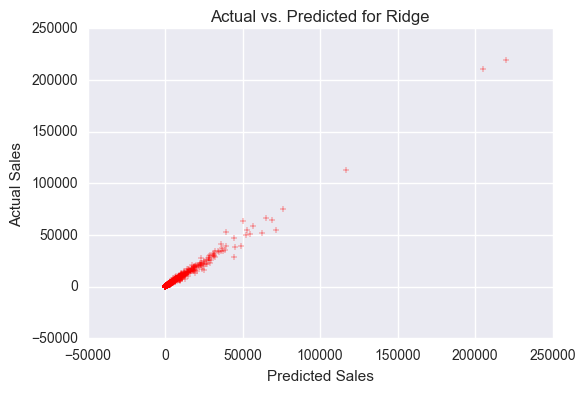

In [39]:
plt.scatter(predictions_ridge, Y_test, c='r', marker='+')
plt.xlabel("Predicted Sales")
plt.ylabel("Actual Sales")
plt.title("Actual vs. Predicted for Ridge")
plt.show()

# Totals

In [40]:
locale.setlocale(locale.LC_ALL, 'en_US')
locale.format("%d", Y_test.sum(), grouping=True), locale.format("%d", predictions_ridge.sum(), grouping=True)

('6,399,497', '6,466,139')

## RIDGE CV

In [41]:
rlmcv = linear_model.RidgeCV(alphas=4, fit_intercept=True, cv=6)
ridge_model_CV = rlm.fit(X, Y)
predictions_ridge_cv = ridge_model.predict(X_test)
print ridge_model_CV.coef_, ridge_model_CV.intercept_
print "r^2 Score:", ridge_model_CV.score(X_test, Y_test)

[  8.00677963  15.01341438  -0.13304894] 14.6597277039
r^2 Score: 0.987726277561


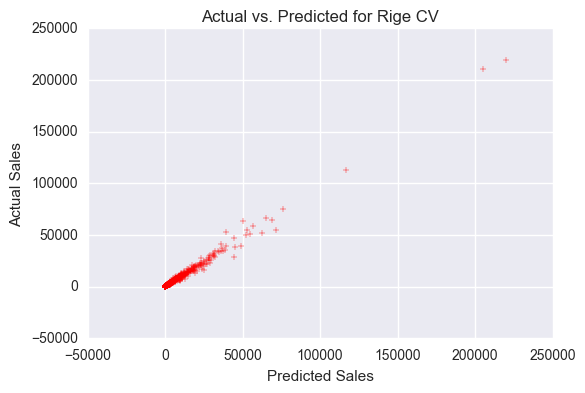

In [42]:
plt.scatter(predictions_ridge_cv, Y_test, c='r', marker='+')
plt.xlabel("Predicted Sales")
plt.ylabel("Actual Sales")
plt.title("Actual vs. Predicted for Rige CV")
plt.show()

# Totals

In [43]:
locale.setlocale(locale.LC_ALL, 'en_US')
locale.format("%d", Y_test.sum(), grouping=True), locale.format("%d", predictions_ridge_cv.sum(), grouping=True)

('6,399,497', '6,466,139')

# Cross Validation

 Five Fold Cross-validated scores: [ 0.97696557  0.88757854  0.98692284]
Ten Fold Cross-Predicted Accuracy: 0.986907847287


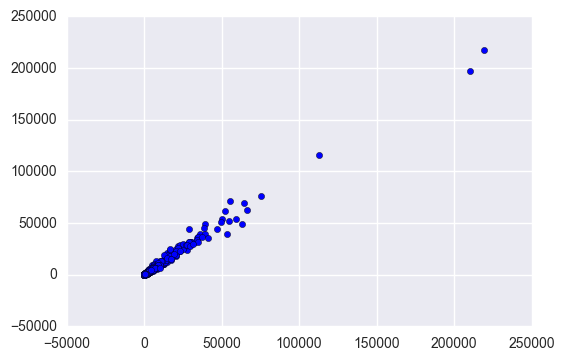

In [46]:
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

# Make 10 fold cross validated predictions
predictions = cross_val_predict(lm, X_test, Y_test, cv=10)
plt.scatter(Y_test, predictions)
scores = cross_val_score(rlm, X, Y, cv=10)
accuracy = metrics.r2_score(Y_test, predictions)
# Perform 6-fold cross validation
scores = cross_val_score(lm, X, Y, cv=3)
accuracy = metrics.r2_score(Y_test, predictions)
print "Five Fold Cross-validated scores:", scores
print "Ten Fold Cross-Predicted Accuracy:", accuracy


##  LASSO

In [47]:
lasso_lm = linear_model.Lasso()
lasso_model = lasso_lm.fit(X,Y)
predictions_lasso = lasso_model.predict(X_test)
print lasso_model.coef_, lasso_model.intercept_
print "Score", lasso_model.score(X_test,Y_test)

[  8.00682773  15.01341147  -0.13304973] 14.6622264155
Score 0.987726254198


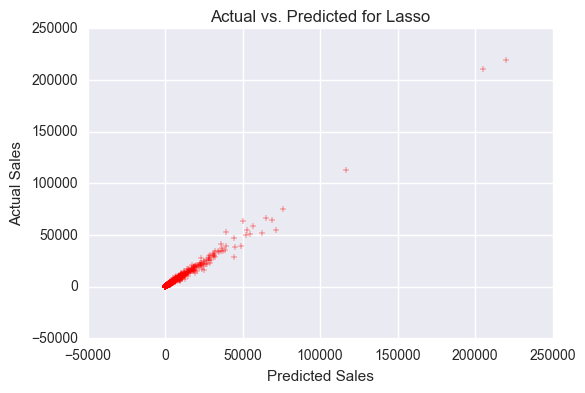

In [48]:
plt.scatter(predictions_lasso, Y_test, c='r', marker='+')
plt.xlabel("Predicted Sales")
plt.ylabel("Actual Sales")
plt.title("Actual vs. Predicted for Lasso")
plt.show()

# Totals

In [49]:
locale.setlocale(locale.LC_ALL, 'en_US')
locale.format("%d", Y_test.sum(), grouping=True), locale.format("%d", predictions_lasso.sum(), grouping=True)

('6,399,497', '6,466,139')

# Lasso CV

In [50]:
lasso_lm_cv = linear_model.LassoCV( fit_intercept=True)
lasso_lm_cv.fit(X, Y)
predictions_lasso_lm_cv = lasso_lm_cv.predict(X_test)
print lasso_lm_cv.coef_, lasso_lm_cv.intercept_
print "r^2 Score:", lasso_lm_cv.score(X_test, Y_test)

[  0.          14.02006459   0.01569424] -495.414933157
r^2 Score: 0.976554358781


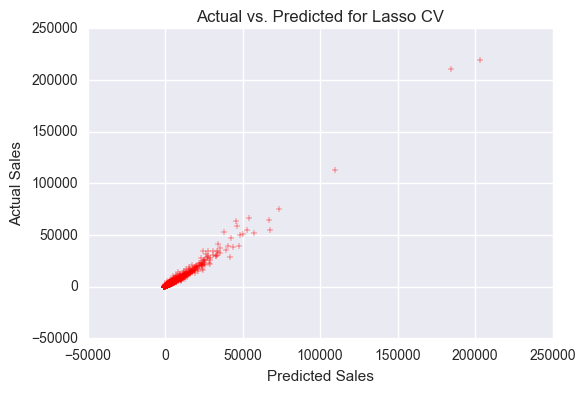

In [51]:
plt.scatter(predictions_lasso_lm_cv, Y_test, c='r', marker='+')
plt.xlabel("Predicted Sales")
plt.ylabel("Actual Sales")
plt.title("Actual vs. Predicted for Lasso CV")
plt.show()

# Totals

In [52]:
locale.setlocale(locale.LC_ALL, 'en_US')
locale.format("%d", Y_test.sum(), grouping=True), locale.format("%d", predictions_lasso_lm_cv.sum(), grouping=True)

('6,399,497', '6,377,538')

# Elastic Net

In [53]:
elastic_lm = linear_model.ElasticNet()
elastic_model = elastic_lm.fit(X,Y)
predictions_elastic = elastic_model.predict(X_test)
print elastic_model.coef_, elastic_model.intercept_
print "Score", elastic_model.score(X_test,Y_test)

[  8.00665695  15.01339495  -0.13304661] 14.6515283628
Score 0.987726362124


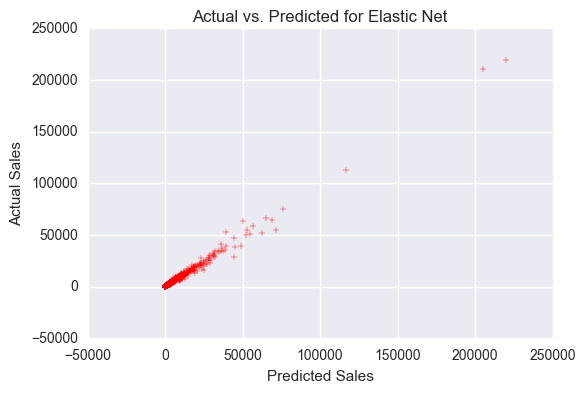

In [54]:
plt.scatter(predictions_elastic, Y_test, c='r', marker='+')
plt.xlabel("Predicted Sales")
plt.ylabel("Actual Sales")
plt.title("Actual vs. Predicted for Elastic Net")
plt.show()

# Totals

In [55]:
locale.setlocale(locale.LC_ALL, 'en_US')
locale.format("%d", Y_test.sum(), grouping=True), locale.format("%d", predictions_elastic.sum(), grouping=True)

('6,399,497', '6,466,137')

# Elastic Net CV

In [56]:
elastic_lm_cv = linear_model.ElasticNetCV()
elastic_lm_cv_model = elastic_lm_cv.fit(X,Y)
predictions_elastic = elastic_lm_cv_model.predict(X_test)
print elastic_lm_cv_model.coef_, elastic_lm_cv_model.intercept_
print "Score", elastic_lm_cv_model.score(X_test,Y_test)

[ 0.01762104  5.07069981  0.11551599] -1086.61674028
Score 0.786045422255


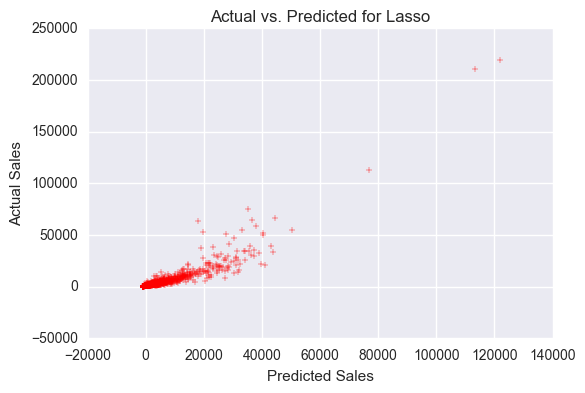

In [57]:
plt.scatter(predictions_elastic, Y_test, c='r', marker='+')
plt.xlabel("Predicted Sales")
plt.ylabel("Actual Sales")
plt.title("Actual vs. Predicted for Lasso")
plt.show()

# Totals

In [58]:
locale.setlocale(locale.LC_ALL, 'en_US')
locale.format("%d", Y_test.sum(), grouping=True), locale.format("%d", predictions_elastic.sum(), grouping=True)

('6,399,497', '6,432,297')

## Plot your results

Again make sure that you record any valuable information. For example, in the tax scenario, did you find the sales from the first three months of the year to be a good predictor of the total sales for the year? Plot the predictions versus the true values and discuss the successes and limitations of your models

# Present the Results

Present your conclusions and results. If you have more than one interesting model feel free to include more than one along with a discussion. Use your work in this notebook to prepare your write-up.